In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [2]:
X, y = fetch_openml('mnist_784' , version = 1 , return_X_y = True , as_frame = False)
X = X / 255
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
X.shape

(70000, 784)

In [4]:
X_train , X_test , y_train , y_test = train_test_split(X,y , random_state= 0 , test_size = 0.7)

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.DataFrame(X)
df.insert(784 , 'label' , y)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


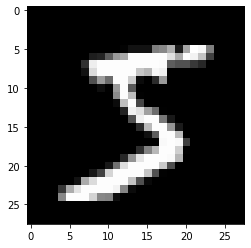

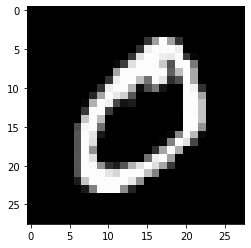

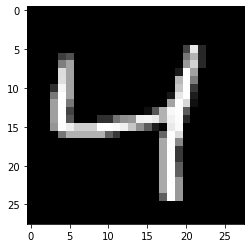

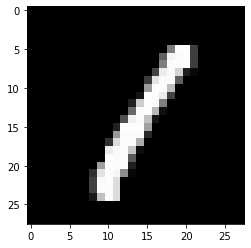

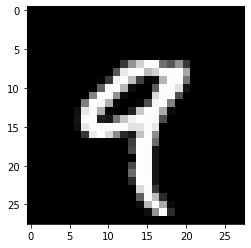

In [7]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.imshow(X[i].reshape((28,28)) , cmap='gray')
    plt.show()

In [8]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=1 , activation='logistic')
mlp1 = MLPClassifier(hidden_layer_sizes=100 , activation='logistic')
mlp2 = MLPClassifier(hidden_layer_sizes=1000 , activation='logistic')

In [9]:
mlp.fit(X_train , y_train)
mlp1.fit(X_train , y_train)
mlp2.fit(X_train , y_train)

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=1000)

In [10]:
pred_NN = mlp.predict(X_test)
pred_NN

array(['6', '7', '1', ..., '8', '2', '1'], dtype='<U1')

In [13]:
pred_NN1 = mlp1.predict(X_test)
pred_NN1

array(['0', '4', '1', ..., '8', '3', '9'], dtype='<U1')

In [14]:
pred_NN2 = mlp2.predict(X_test)
pred_NN2

array(['0', '4', '1', ..., '8', '3', '9'], dtype='<U1')

Actual Values : 4
Predicted Value For 1 Hidden Layer : 7
Predicted Value For 100 Hidden Layer : 4
Predicted Value For 1000 Hidden Layer : 4


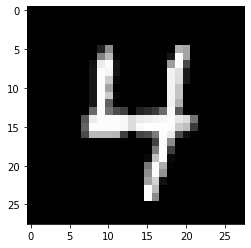

In [18]:
print(f'Actual Values : {y_test[1]}')
print(f'Predicted Value For 1 Hidden Layer : {pred_NN[1]}')
print(f'Predicted Value For 100 Hidden Layer : {pred_NN1[1]}')
print(f'Predicted Value For 1000 Hidden Layer : {pred_NN2[1]}')

plt.imshow(X_test[1].reshape(28,28) , cmap='gray')
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test , pred_NN)

array([[   0,   47,  753,  259,    0,    0, 3826,    7,   19,    0],
       [   0, 4973,   43,  104,    0,    0,   85,  165,  174,    0],
       [   0,  149,  699,  562,    0,    0, 3302,   62,  122,    0],
       [   0,  913,  825, 1910,    0,    0,  626,  155,  557,    0],
       [   0,  377,   35,   64,    0,    0,   37, 4226,   29,    0],
       [   0,  794,  790, 1797,    0,    0,  429,   99,  475,    0],
       [   0,   33,  219,  123,    0,    0, 4374,    8,   23,    0],
       [   0,  479,   11,   47,    0,    0,   13, 4491,   31,    0],
       [   0, 1773,  285, 1563,    0,    0,  136,  146,  854,    0],
       [   0,  282,   21,   57,    0,    0,   14, 4505,   23,    0]],
      dtype=int64)

In [20]:
confusion_matrix(y_test , pred_NN1)

array([[4798,    1,   13,    4,   11,   17,   27,    9,   26,    5],
       [   0, 5459,   18,   14,    8,    3,    6,   11,   16,    9],
       [  15,    9, 4705,   23,   35,    9,   19,   32,   44,    5],
       [   6,   13,   65, 4685,    4,   90,    6,   29,   66,   22],
       [   3,    9,   19,    3, 4622,    5,   20,   10,   11,   66],
       [  18,    7,   12,   44,   13, 4187,   39,   10,   35,   19],
       [  21,    7,   29,    4,   21,   21, 4655,    6,   16,    0],
       [   2,   16,   33,   13,   37,    5,    0, 4916,    7,   43],
       [  21,   31,   18,   43,   14,   45,   24,    9, 4529,   23],
       [  18,    9,    4,   27,   96,   27,    3,   61,   21, 4636]],
      dtype=int64)

In [21]:
confusion_matrix(y_test , pred_NN2)

array([[4808,    1,   15,    3,    6,   13,   29,    5,   22,    9],
       [   1, 5467,   26,    9,    6,    1,    4,   11,   10,    9],
       [  13,    5, 4757,   16,   29,    2,   13,   31,   24,    6],
       [   4,   10,   67, 4749,    4,   60,    4,   23,   44,   21],
       [   6,   10,   17,    2, 4617,    2,   19,   12,    8,   75],
       [  15,    7,    9,   40,    7, 4221,   34,    9,   22,   20],
       [  15,    9,   16,    3,   12,   18, 4686,    7,   14,    0],
       [   1,   16,   43,   12,   29,    4,    0, 4924,    3,   40],
       [  16,   28,   23,   30,   12,   25,   18,    3, 4577,   25],
       [  19,    9,    2,   27,   58,   20,    3,   59,   21, 4684]],
      dtype=int64)

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test , pred_NN))

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4911
           1       0.51      0.90      0.65      5544
           2       0.19      0.14      0.16      4896
           3       0.29      0.38      0.33      4986
           4       0.00      0.00      0.00      4768
           5       0.00      0.00      0.00      4384
           6       0.34      0.92      0.50      4780
           7       0.32      0.89      0.47      5072
           8       0.37      0.18      0.24      4757
           9       0.00      0.00      0.00      4902

    accuracy                           0.35     49000
   macro avg       0.20      0.34      0.24     49000
weighted avg       0.21      0.35      0.24     49000



c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
print(classification_report(y_test , pred_NN1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4911
           1       0.98      0.98      0.98      5544
           2       0.96      0.96      0.96      4896
           3       0.96      0.94      0.95      4986
           4       0.95      0.97      0.96      4768
           5       0.95      0.96      0.95      4384
           6       0.97      0.97      0.97      4780
           7       0.97      0.97      0.97      5072
           8       0.95      0.95      0.95      4757
           9       0.96      0.95      0.95      4902

    accuracy                           0.96     49000
   macro avg       0.96      0.96      0.96     49000
weighted avg       0.96      0.96      0.96     49000



In [25]:
print(classification_report(y_test , pred_NN2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4911
           1       0.98      0.99      0.98      5544
           2       0.96      0.97      0.96      4896
           3       0.97      0.95      0.96      4986
           4       0.97      0.97      0.97      4768
           5       0.97      0.96      0.96      4384
           6       0.97      0.98      0.98      4780
           7       0.97      0.97      0.97      5072
           8       0.96      0.96      0.96      4757
           9       0.96      0.96      0.96      4902

    accuracy                           0.97     49000
   macro avg       0.97      0.97      0.97     49000
weighted avg       0.97      0.97      0.97     49000

